In [48]:
from warnings import filterwarnings
filterwarnings('ignore')
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay,classification_report



In [2]:
df = pd.read_csv('iris.csv')
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
df.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [5]:
df['species'].value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

<Axes: xlabel='species'>

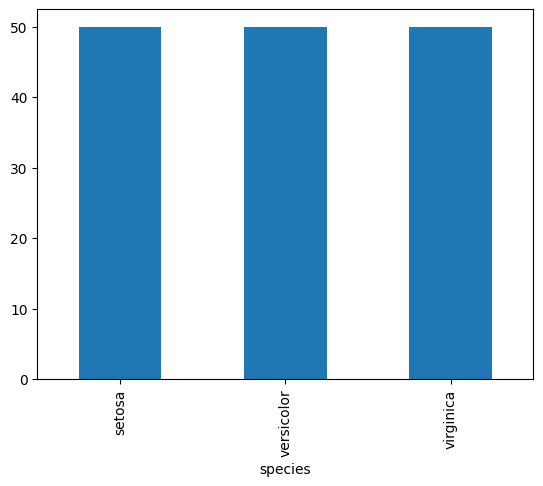

In [6]:
df['species'].value_counts().plot(kind='bar')

### Seperate x and y features

In [7]:
x = df.drop(columns=['species'])
y = df[['species']]

In [8]:
x.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [9]:
y.head()

,species
0,setosa
1,setosa
2,setosa
3,setosa
4,setosa


### Preprocess the x value

In [14]:
num_pipe = Pipeline(steps=[('impute', SimpleImputer(strategy="mean")),
                           ('sacler', StandardScaler())]).set_output(transform='pandas')

In [15]:
x_pre = num_pipe.fit_transform(x)
x_pre.head()

,sepal_length,sepal_width,petal_length,petal_width
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


### Train Test Split

In [16]:
xtrain, xtest, ytrain, ytest = train_test_split(x_pre, y, test_size=0.3, random_state=42)

In [17]:
xtrain.head()

,sepal_length,sepal_width,petal_length,petal_width
81,-0.416010,-1.513160,-0.032966,-0.262387
133,0.553333,-0.592373,0.762758,0.395774
137,0.674501,0.098217,0.990108,0.790671
75,0.916837,-0.131979,0.364896,0.264142
109,1.643844,1.249201,1.331133,1.712096


In [18]:
ytrain.head()

,species
81,versicolor
133,virginica
137,virginica
75,versicolor
109,virginica


In [19]:
xtrain.shape

(105, 4)

In [20]:
xtest.shape

(45, 4)

### Create a KNN Model

In [22]:
model = KNeighborsClassifier(n_neighbors=40)
model.fit(xtrain, ytrain)

KNeighborsClassifier(n_neighbors=40)

In [23]:
model.score(xtrain, ytrain)

0.8571428571428571

In [24]:
model.score(xtest, ytest)

0.8888888888888888

### Hyperparamete tuning with GridSearchCV

In [26]:
params = {'n_neighbors':[2,3,4,5,6,7,8,9,10]}

In [28]:
knn = KNeighborsClassifier()
gscv = GridSearchCV(knn, param_grid=params, cv=5, scoring='f1_macro')
gscv.fit(xtrain,ytrain)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [2, 3, 4, 5, 6, 7, 8, 9, 10]},
             scoring='f1_macro')

In [29]:
gscv.best_params_

{'n_neighbors': 3}

In [30]:
gscv.best_score_

0.9453393665158372

In [31]:
best_knn = gscv.best_estimator_
best_knn

KNeighborsClassifier(n_neighbors=3)

In [32]:
best_knn.score(xtrain, ytrain)

0.9428571428571428

In [33]:
best_knn.score(xtest, ytest)

1.0

### Predict results for train and test

In [35]:
ypred_tr = best_knn.predict(xtrain)
ypred_ts = best_knn.predict(xtest)

In [36]:
ypred_tr[0:5]

array(['versicolor', 'versicolor', 'virginica', 'versicolor', 'virginica'],
      dtype=object)

In [37]:
ytrain.head()

,species
81,versicolor
133,virginica
137,virginica
75,versicolor
109,virginica


In [38]:
ypred_ts[0:5]

array(['versicolor', 'setosa', 'virginica', 'versicolor', 'versicolor'],
      dtype=object)

### create a Confusion matrix

In [40]:
c = best_knn.classes_
c

array(['setosa', 'versicolor', 'virginica'], dtype=object)

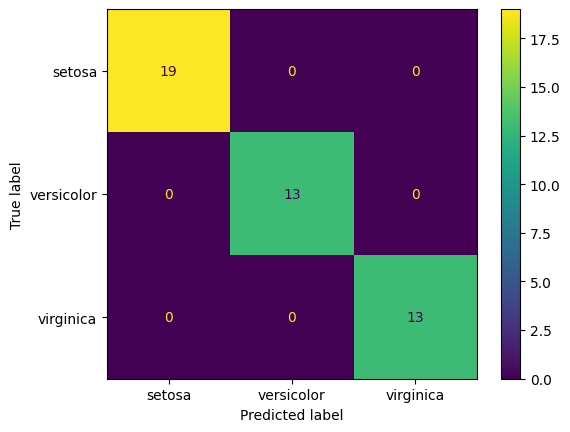

In [41]:
cf = confusion_matrix(ytest, ypred_ts)
cfd = ConfusionMatrixDisplay(cf, display_labels=c)
cfd.plot()

### Check classification report

In [42]:
print(classification_report(ytest, ypred_ts))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



### Predict for out of sample data

In [43]:
xnew = pd.read_csv('iris_sample.csv')
xnew

,sepal_length,sepal_width,petal_length,petal_width
0,5.5,2.5,4.0,1.3
1,6.9,3.1,5.1,2.3
2,5.1,2.5,3.0,1.1
3,4.4,2.9,NaN,0.2
4,5.9,3.0,5.1,1.8
5,5.5,3.5,1.3,0.2
6,5.6,NaN,3.6,1.3
7,6.5,3.0,5.2,2.0
8,5.3,3.7,1.5,0.2
9,5.1,3.4,1.5,NaN


In [44]:
xnew_pre = num_pipe.transform(xnew)
xnew_pre

,sepal_length,sepal_width,petal_length,petal_width
0,-0.416010,-1.282963,0.137547,0.132510
1,1.280340,0.098217,0.762758,1.448832
2,-0.900681,-1.282963,-0.430828,-0.130755
3,-1.748856,-0.362176,0.000000,-1.315444
4,0.068662,-0.131979,0.762758,0.790671
5,-0.416010,1.019004,-1.397064,-1.315444
6,-0.294842,0.000000,-0.089803,0.132510
7,0.795669,-0.131979,0.819596,1.053935
8,-0.658345,1.479398,-1.283389,-1.315444
9,-0.900681,0.788808,-1.283389,0.000000


In [45]:
preds = best_knn.predict(xnew_pre)
preds

array(['versicolor', 'virginica', 'versicolor', 'setosa', 'virginica',
       'setosa', 'versicolor', 'virginica', 'setosa', 'setosa',
       'versicolor', 'versicolor', 'virginica', 'versicolor',
       'versicolor'], dtype=object)

In [46]:
probs = best_knn.predict_proba(xnew_pre)
probs

array([[0.        , 1.        , 0.        ],
       [0.        , 0.        , 1.        ],
       [0.        , 1.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [0.        , 0.33333333, 0.66666667],
       [1.        , 0.        , 0.        ],
       [0.        , 1.        , 0.        ],
       [0.        , 0.        , 1.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [0.        , 1.        , 0.        ],
       [0.        , 1.        , 0.        ],
       [0.        , 0.        , 1.        ],
       [0.        , 1.        , 0.        ],
       [0.        , 0.66666667, 0.33333333]])

In [47]:
best_knn.classes_

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [49]:
max_probs = np.max(probs,axis=1)
max_probs

array([1.        , 1.        , 1.        , 1.        , 0.66666667,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 0.66666667])

In [52]:
xnew['species_pred'] = preds
xnew['species_prob'] = max_probs

In [53]:
xnew

,sepal_length,sepal_width,petal_length,petal_width,species_pred,species_prob
0,5.5,2.5,4.0,1.3,versicolor,1.000000
1,6.9,3.1,5.1,2.3,virginica,1.000000
2,5.1,2.5,3.0,1.1,versicolor,1.000000
3,4.4,2.9,NaN,0.2,setosa,1.000000
4,5.9,3.0,5.1,1.8,virginica,0.666667
5,5.5,3.5,1.3,0.2,setosa,1.000000
6,5.6,NaN,3.6,1.3,versicolor,1.000000
7,6.5,3.0,5.2,2.0,virginica,1.000000
8,5.3,3.7,1.5,0.2,setosa,1.000000
9,5.1,3.4,1.5,NaN,setosa,1.000000


In [54]:
xnew.to_csv('irisKNNResult.csv', index=False)